In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [4]:
#Descriptive stats
df.describe()

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
count,307645.000000,307645.000000,307642.000000,307645.000000,307645.000000
mean,2018.438525,6.423862,7.024071,6.936465,25.294597
std,1.083061,3.461812,30.986238,30.237195,249.916798
min,2017.000000,1.000000,-6.490000,-38.490000,-7800.000000
25%,2017.000000,3.000000,0.000000,0.000000,0.000000
50%,2019.000000,7.000000,0.320000,0.000000,1.000000
75%,2019.000000,9.000000,3.267500,3.000000,5.000000
max,2020.000000,12.000000,2739.000000,1990.830000,18317.000000


In [5]:
#Check for duplicates
df.duplicated().any()

np.False_

In [6]:
#Check for nulls
df.isna().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [7]:
#drop nulls
df = df.dropna(subset=['SUPPLIER','ITEM TYPE', 'RETAIL SALES'])

Data exploration

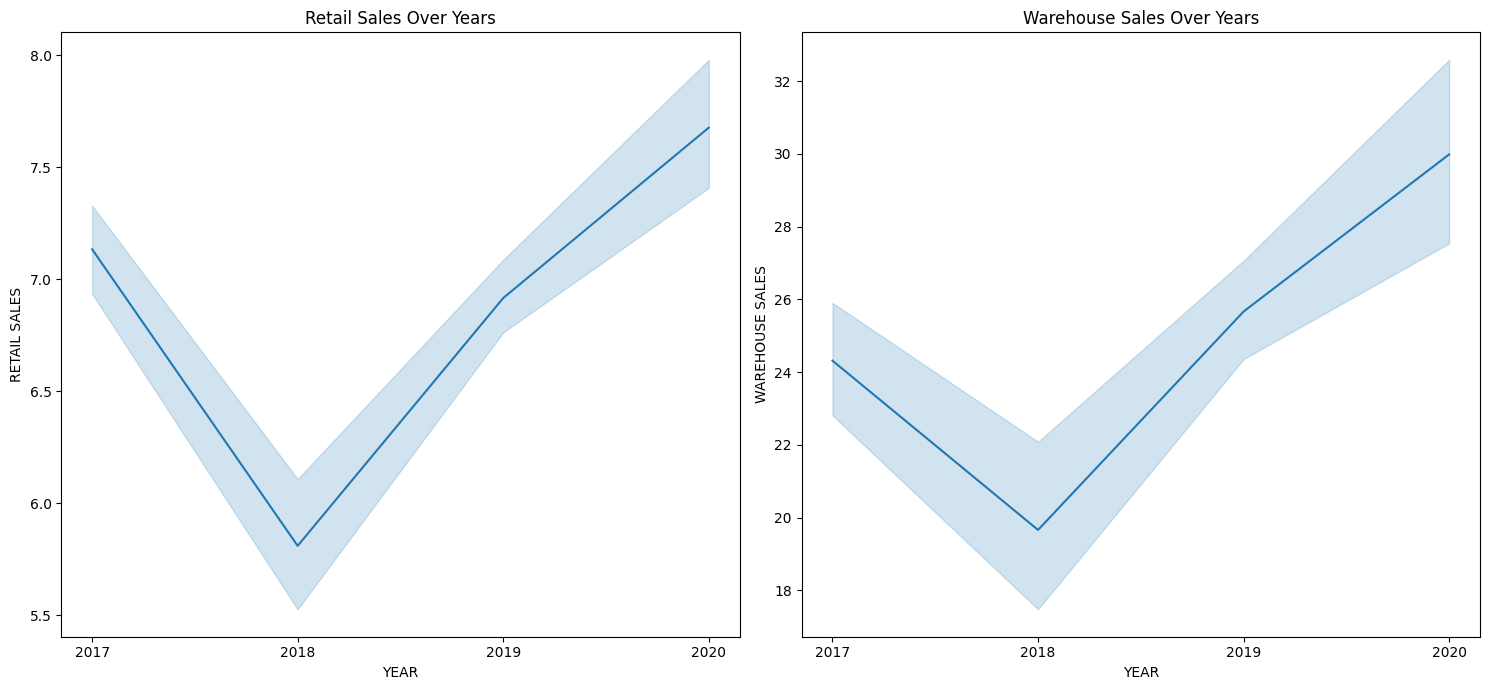

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))  # smaller height

# First plot: RETAIL SALES
sns.lineplot(data=df, x='YEAR', y='RETAIL SALES', ax=ax[0])
ax[0].set_xticks(df['YEAR'].unique())
ax[0].set_title('Retail Sales Over Years')


# Second plot: WHOLESALE SALES
sns.lineplot(data=df, x='YEAR', y='WAREHOUSE SALES', ax=ax[1])
ax[1].set_xticks(df['YEAR'].unique())
ax[1].set_title('Warehouse Sales Over Years')


plt.tight_layout()
plt.show()


In [11]:
sales_per_item = df.groupby('ITEM TYPE').agg({'RETAIL SALES':'sum', 'WAREHOUSE SALES':'sum'}).reset_index()
sales_per_item

,ITEM TYPE,RETAIL SALES,WAREHOUSE SALES
0,BEER,574220.53,6527236.51
1,DUNNAGE,0.00,-121307.00
2,KEGS,0.00,118431.00
3,LIQUOR,802691.43,94906.27
4,NON-ALCOHOL,27150.31,26149.59
5,REF,663.63,0.00
6,STR_SUPPLIES,2234.90,0.00
7,WINE,746498.59,1156984.91


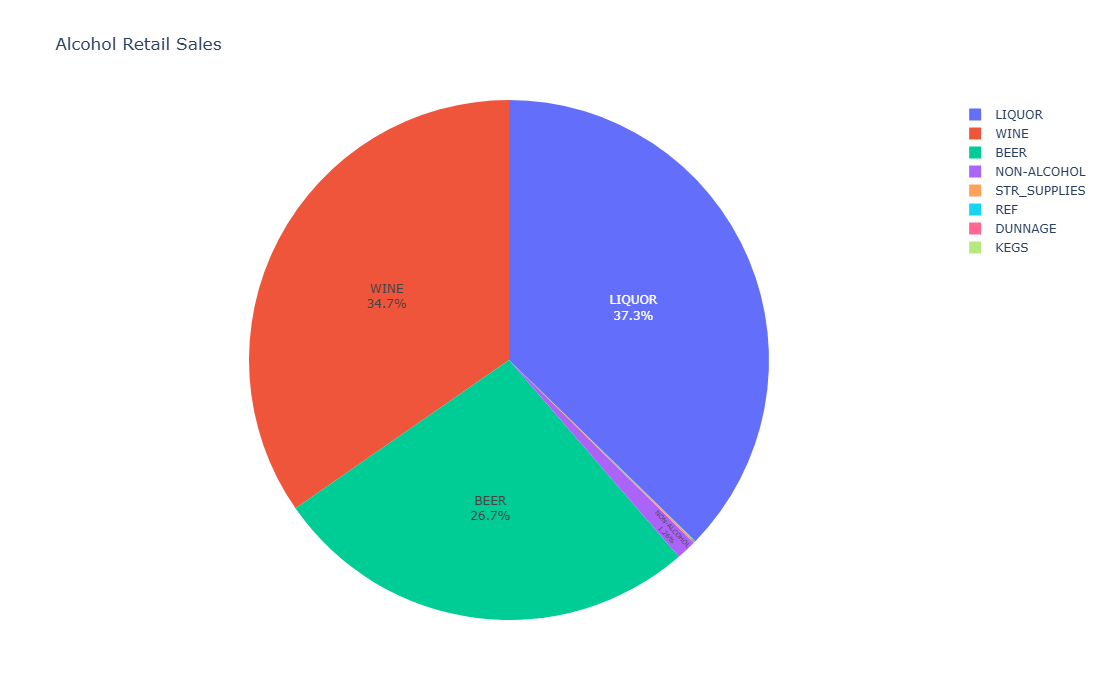

In [12]:
fig=px.pie(sales_per_item, values='RETAIL SALES', names='ITEM TYPE', title='Alcohol Retail Sales',width=700, height=700)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

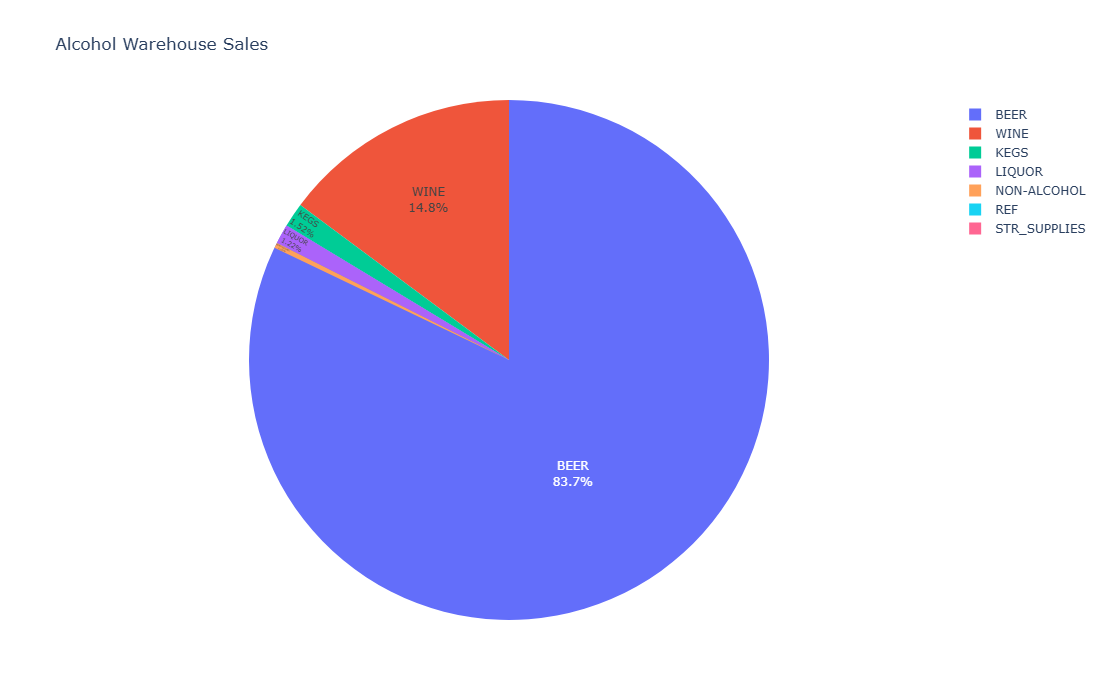

In [13]:
fig=px.pie(sales_per_item, values='WAREHOUSE SALES', names='ITEM TYPE', title='Alcohol Warehouse Sales',width=700, height=700)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Text(0.5, 1.0, 'Warehouse vs Retail Sales by Item Type')

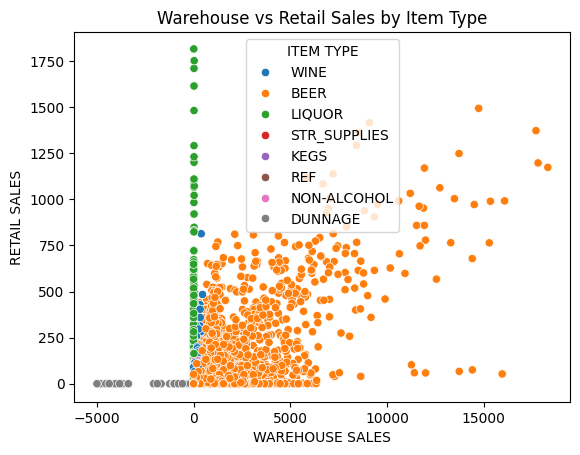

In [14]:
sns.scatterplot(data=df, x='WAREHOUSE SALES', y='RETAIL SALES', hue='ITEM TYPE')
plt.title('Warehouse vs Retail Sales by Item Type')

Text(0.5, 1.0, 'Year on Year Alcohol Sales by type')

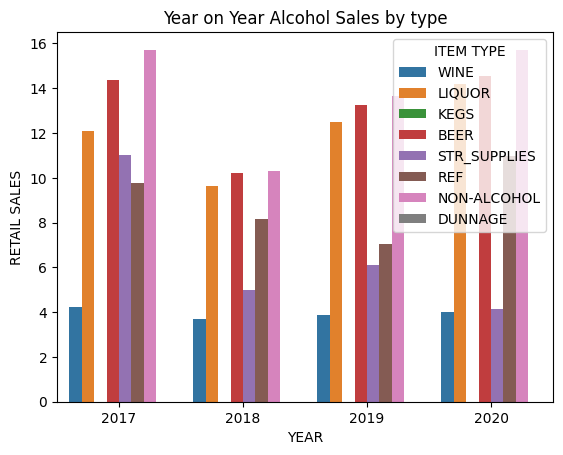

In [15]:
sns.barplot(data=df, x='YEAR', y='RETAIL SALES', hue='ITEM TYPE',ci=None)
plt.title('Year on Year Alcohol Sales by type')

In [16]:
# Find the most expensive item per item type (by unit price or retail sales per unit)
most_expensive = df.sort_values(['ITEM TYPE', 'RETAIL SALES'], ascending=[True, False]).drop_duplicates('ITEM TYPE')

# Count how many times each item was sold
item_counts = df['ITEM DESCRIPTION'].value_counts().rename('PURCHASE COUNT').reset_index()
item_counts.columns = ['ITEM DESCRIPTION', 'PURCHASE COUNT']

# Merge the count back with the most expensive items
expensive = most_expensive.merge(item_counts, on='ITEM DESCRIPTION', how='left')

# Optional: Clean up columns
expensive = expensive[['ITEM TYPE', 'ITEM DESCRIPTION', 'RETAIL SALES', 'PURCHASE COUNT']]
expensive

,ITEM TYPE,ITEM DESCRIPTION,RETAIL SALES,PURCHASE COUNT
0,BEER,CORONA EXTRA LOOSE NR - 12OZ,1494.00,24
1,DUNNAGE,EMPTY 1/2 KEG (30.00),0.00,24
2,KEGS,FIRESTONE NITRO MERLIN - 50L,0.00,15
3,LIQUOR,TITO'S HANDMADE VODKA - 1.75L,1816.49,24
4,NON-ALCOHOL,GOSLINGS GINGER BEER-NA-4/6 CAN - 12OZ (SODA),329.27,24
5,REF,STORE SPECIAL WINE 10 LITER - 10L,36.00,2
6,STR_SUPPLIES,WINE PAPER GIFT TOTE SINGLE BOTTLE,368.64,24
7,WINE,LA MARCA PROSECCO - 750ML,813.84,24


In [17]:
#Group by supplier
supplier_sales = df.groupby('SUPPLIER').agg({'RETAIL SALES' : 'sum', 'WAREHOUSE SALES':'sum'}).reset_index()

#Sort suppliers in descending order
supplier_sales=supplier_sales.sort_values(by=['RETAIL SALES','WAREHOUSE SALES'], ascending=False)

#select_ top 10 suppliers
top_supplier = supplier_sales.nlargest(10, ['RETAIL SALES','WAREHOUSE SALES'] )
top_supplier

,SUPPLIER,RETAIL SALES,WAREHOUSE SALES
108,E & J GALLO WINERY,166170.53,197463.78
90,DIAGEO NORTH AMERICA INC,145343.20,170564.63
76,CONSTELLATION BRANDS,131664.79,119399.51
15,ANHEUSER BUSCH INC,109960.82,1331170.84
173,JIM BEAM BRANDS CO,96164.04,7942.81
214,MILLER BREWING COMPANY,87156.44,1425428.71
81,CROWN IMPORTS,84437.66,1651871.51
293,SAZERAC CO,70414.62,16916.29
26,BACARDI USA INC,66610.23,9999.07
344,THE WINE GROUP,64270.04,72191.57


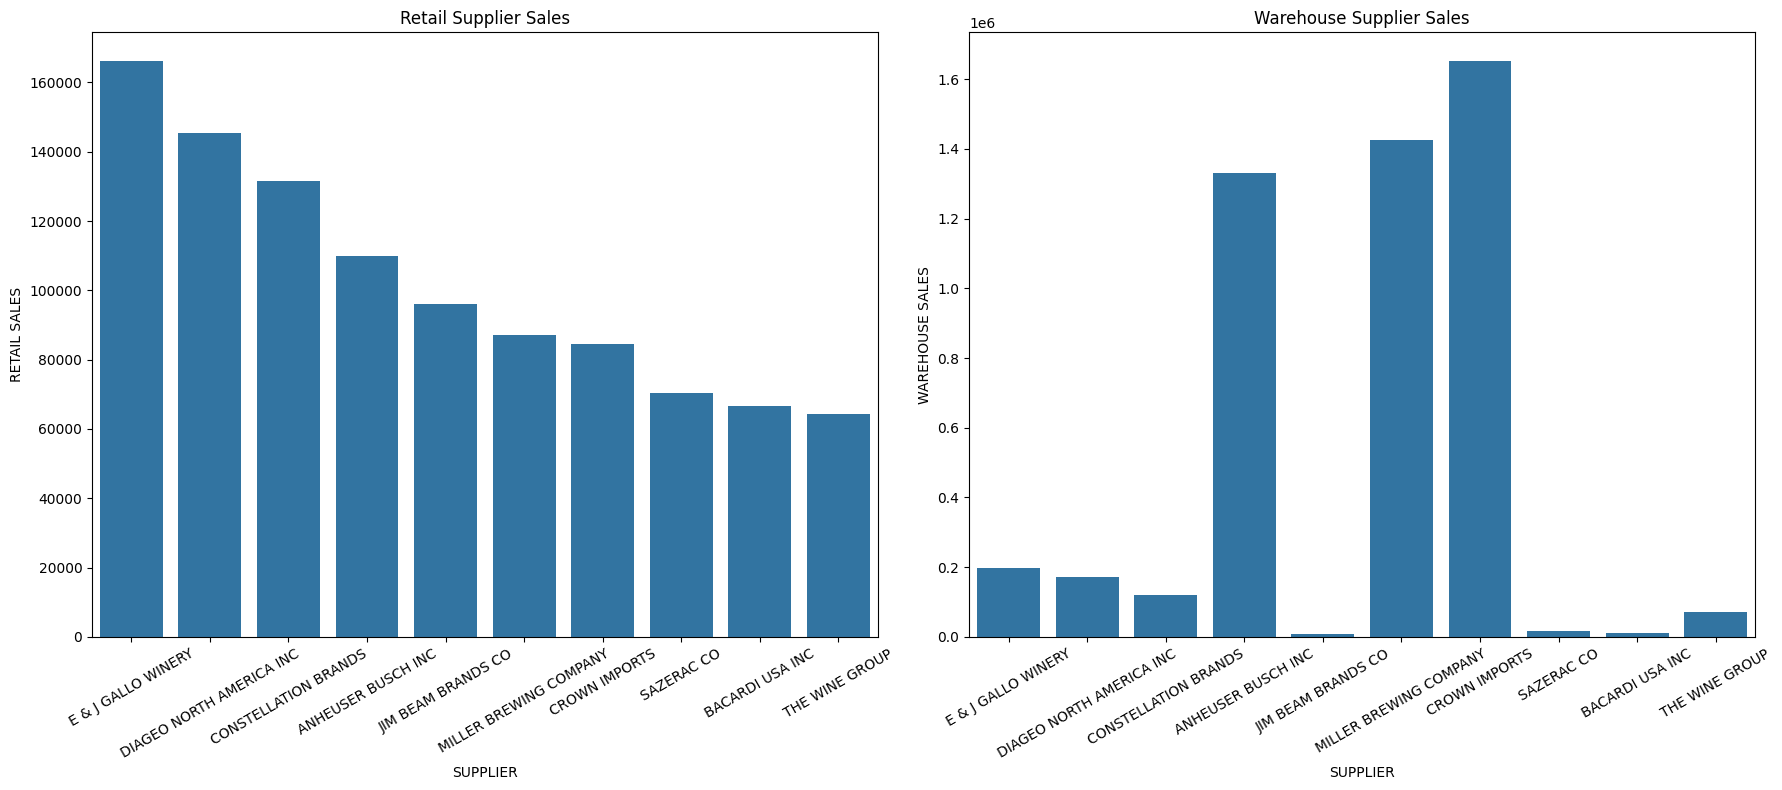

In [45]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18, 8))

sns.barplot(data=top_supplier, x='SUPPLIER', y='RETAIL SALES', ax=ax[0])
ax[0].tick_params(axis='x', rotation=30)
ax[0].set_title('Retail Supplier Sales')



sns.barplot(data=top_supplier, x='SUPPLIER', y='WAREHOUSE SALES', ax=ax[1])
ax[1].tick_params(axis='x', rotation=30)
ax[1].set_title('Warehouse Supplier Sales')


plt.tight_layout()
plt.show()

Modelling

In [21]:
#drop unwanted columns
new_df = df.drop(['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION'], axis=1)
new_df.head()

,YEAR,MONTH,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,WINE,0.00,0.0,2.0
1,2020,1,WINE,0.00,1.0,4.0
2,2020,1,BEER,0.00,0.0,1.0
3,2020,1,WINE,0.00,0.0,1.0
4,2020,1,WINE,0.82,0.0,0.0


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df['ITEM TYPE'] = le.fit_transform(new_df['ITEM TYPE'])
new_df.head()

,YEAR,MONTH,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,7,0.00,0.0,2.0
1,2020,1,7,0.00,1.0,4.0
2,2020,1,0,0.00,0.0,1.0
3,2020,1,7,0.00,0.0,1.0
4,2020,1,7,0.82,0.0,0.0


In [23]:
# defining our X and y
X = new_df.drop(['RETAIL SALES'],axis=1,)
y=new_df['RETAIL SALES']

In [24]:
#Spliting our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(245981, 5)
(61496, 5)
(245981,)
(61496,)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
lr_preds = lr.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, lr_preds)
r2 = r2_score(y_test, lr_preds)
print("MSE:", mse)
print("R² score:", r2)

MSE: 37.07920066713223
R² score: 0.9564507937255595


In [43]:
#Logistic Regression
tree = DecisionTreeRegressor(max_depth=10)

tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10)

In [44]:
tree_preds = tree.predict(X_test_scaled)

mse = mean_squared_error(y_test, tree_preds)
r2 = r2_score(y_test, tree_preds)
print("MSE:", mse)
print("R² score:", r2)

MSE: 53.20878983625817
R² score: 0.9375067282330449
